# Skew - t

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units


from datetime import datetime 
from metpy.plots import SkewT
from metpy.units import units, pandas_dataframe_to_unit_arrays
from siphon.simplewebservice.wyoming import WyomingUpperAir

import matplotlib.patches as mpatches


# PyroCb

In [2]:
date = datetime(2021,7,1)
station = "ZXS"
df_pyrocb2 = WyomingUpperAir.request_data(date, station)
d_pyrocb2 = pandas_dataframe_to_unit_arrays(df_pyrocb2)
df_pyrocb2.head()

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,936.0,601,35.4,13.4,270.0,3.0,3.000000,5.510911e-16,ZXS,71908,2021-07-01,53.9,-122.79,601.0,33.86
1,930.0,658,33.2,16.2,281.0,5.0,4.908136,-9.540450e-01,ZXS,71908,2021-07-01,53.9,-122.79,601.0,33.86
2,926.0,696,32.8,14.8,288.0,7.0,6.657396,-2.163119e+00,ZXS,71908,2021-07-01,53.9,-122.79,601.0,33.86
3,925.0,706,32.6,14.6,290.0,7.0,6.577848,-2.394141e+00,ZXS,71908,2021-07-01,53.9,-122.79,601.0,33.86
4,903.4,914,30.6,14.0,280.0,4.0,3.939231,-6.945927e-01,ZXS,71908,2021-07-01,53.9,-122.79,601.0,33.86


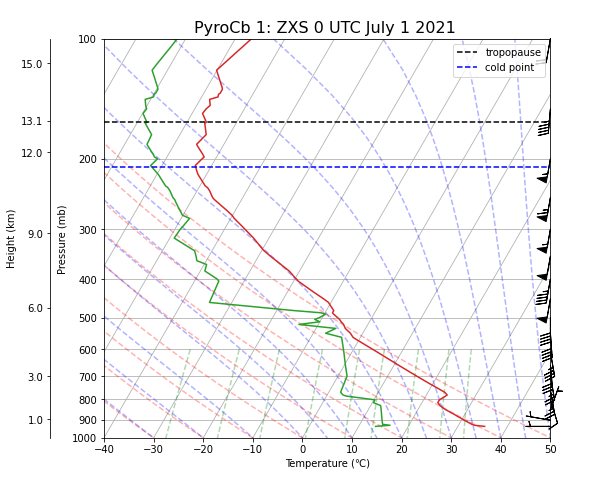

In [3]:
fig = plt.figure(figsize=(8, 16))
skew = SkewT(fig)

skew.plot(d_pyrocb2["pressure"], d_pyrocb2["temperature"], 'tab:red')
skew.plot(d_pyrocb2["pressure"], d_pyrocb2["dewpoint"], 'tab:green')

# Set some better labels than the default
skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})')
skew.ax.set_ylabel('Pressure (mb)')

# Set spacing interval--Every 50 mb from 1000 to 100 mb
my_interval = np.arange(100, 1000, 50) * units('mbar')

# Get indexes of values closest to defined interval
ix = mpcalc.resample_nn_1d(d_pyrocb2["pressure"], my_interval)

# Plot only values nearest to defined interval values
skew.plot_barbs(d_pyrocb2["pressure"][ix], d_pyrocb2["u_wind"][ix], d_pyrocb2["v_wind"][ix])

# Add the relevant special lines
skew.plot_dry_adiabats(alpha = 0.3)
skew.plot_moist_adiabats(alpha = 0.3)
skew.plot_mixing_lines(alpha = 0.3)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 50)

# add height labels to right y axis


"""decimate = 5
for p, t, h in zip(d_pyrocb2["pressure"][::decimate], d_pyrocb2["temperature"][::decimate], 
                  d_pyrocb2["height"][::decimate]):
    if p >= 100 * units.hPa: 
        skew.ax2.text(1.08, p, round(h.m / 1000, 0), transform=skew.ax2.get_yaxis_transform(which='tick2'))

plt.axhline(y=-54,  linestyle='-', color = "black")

"""

secax = skew.ax.secondary_yaxis(-0.12,
    functions=(
        lambda p: mpcalc.pressure_to_height_std(units.Quantity(p, 'hPa')).m_as('km'),
        lambda h: mpcalc.height_to_pressure_std(units.Quantity(h, 'km')).m))
secax.yaxis.set_major_locator(plt.FixedLocator([0, 1, 3, 6, 9, 12,13.1, 15]))
secax.yaxis.set_minor_locator(plt.NullLocator())
secax.yaxis.set_major_formatter(plt.ScalarFormatter())
secax.set_ylabel('Height (km)')


skew.ax.axhline(y=162,  linestyle='--', color = "black", label = "tropopause")
skew.ax.axhline(y=210,  linestyle='--', color = "blue", label = "cold point")
plt.legend()

plt.title("PyroCb 1: ZXS 0 UTC July 1 2021 ", fontsize = 16)
# Show the plot
plt.show()

# all data

In [4]:
# pyrocb event 1
date = datetime(2021,6,30,0)
station = "ZXS"
df_pyrocb1 = WyomingUpperAir.request_data(date, station)
d_pyrocb1 = pandas_dataframe_to_unit_arrays(df_pyrocb1)

# pyrocb event 2 
date = datetime(2021,7,1,0)
station = "ZXS"
df_pyrocb2 = WyomingUpperAir.request_data(date, station)
d_pyrocb2 = pandas_dataframe_to_unit_arrays(df_pyrocb2)

# smoke case 
date = datetime(2021,6,29,0)
station = "YYE"
df_smoke = WyomingUpperAir.request_data(date, station)
d_smoke = pandas_dataframe_to_unit_arrays(df_smoke)

# clean 1 
date = datetime(2019,6,9,0)
station = "ZXS"
df_clean1= WyomingUpperAir.request_data(date, station)
d_clean1 = pandas_dataframe_to_unit_arrays(df_clean1)


# clean 2 
date = datetime(2019,6,13,0)
station = "ZXS"
df_clean2= WyomingUpperAir.request_data(date, station)
d_clean2 = pandas_dataframe_to_unit_arrays(df_clean2)


# clean 3
date = datetime(2019,6,27,0)
station = "ZXS"
df_clean3= WyomingUpperAir.request_data(date, station)
d_clean3 = pandas_dataframe_to_unit_arrays(df_clean3)


# clean 4
date = datetime(2019,6,28,0)
station = "ZXS"
df_clean4= WyomingUpperAir.request_data(date, station)
d_clean4 = pandas_dataframe_to_unit_arrays(df_clean4)


# clean 5 
date = datetime(2021,6,15,0)
station = "WSE"
df_clean5= WyomingUpperAir.request_data(date, station)
d_clean5 = pandas_dataframe_to_unit_arrays(df_clean5)


In [5]:
# 132 , 145, 146, 122, 
np.shape(d_clean1["pressure"]), np.shape(d_clean1["height"]), np.shape(d_clean1["temperature"]), np.shape(d_clean2["pressure"]), np.shape(d_clean2["height"]), np.shape(d_clean2["temperature"])



((146,), (146,), (146,), (122,), (122,), (122,))

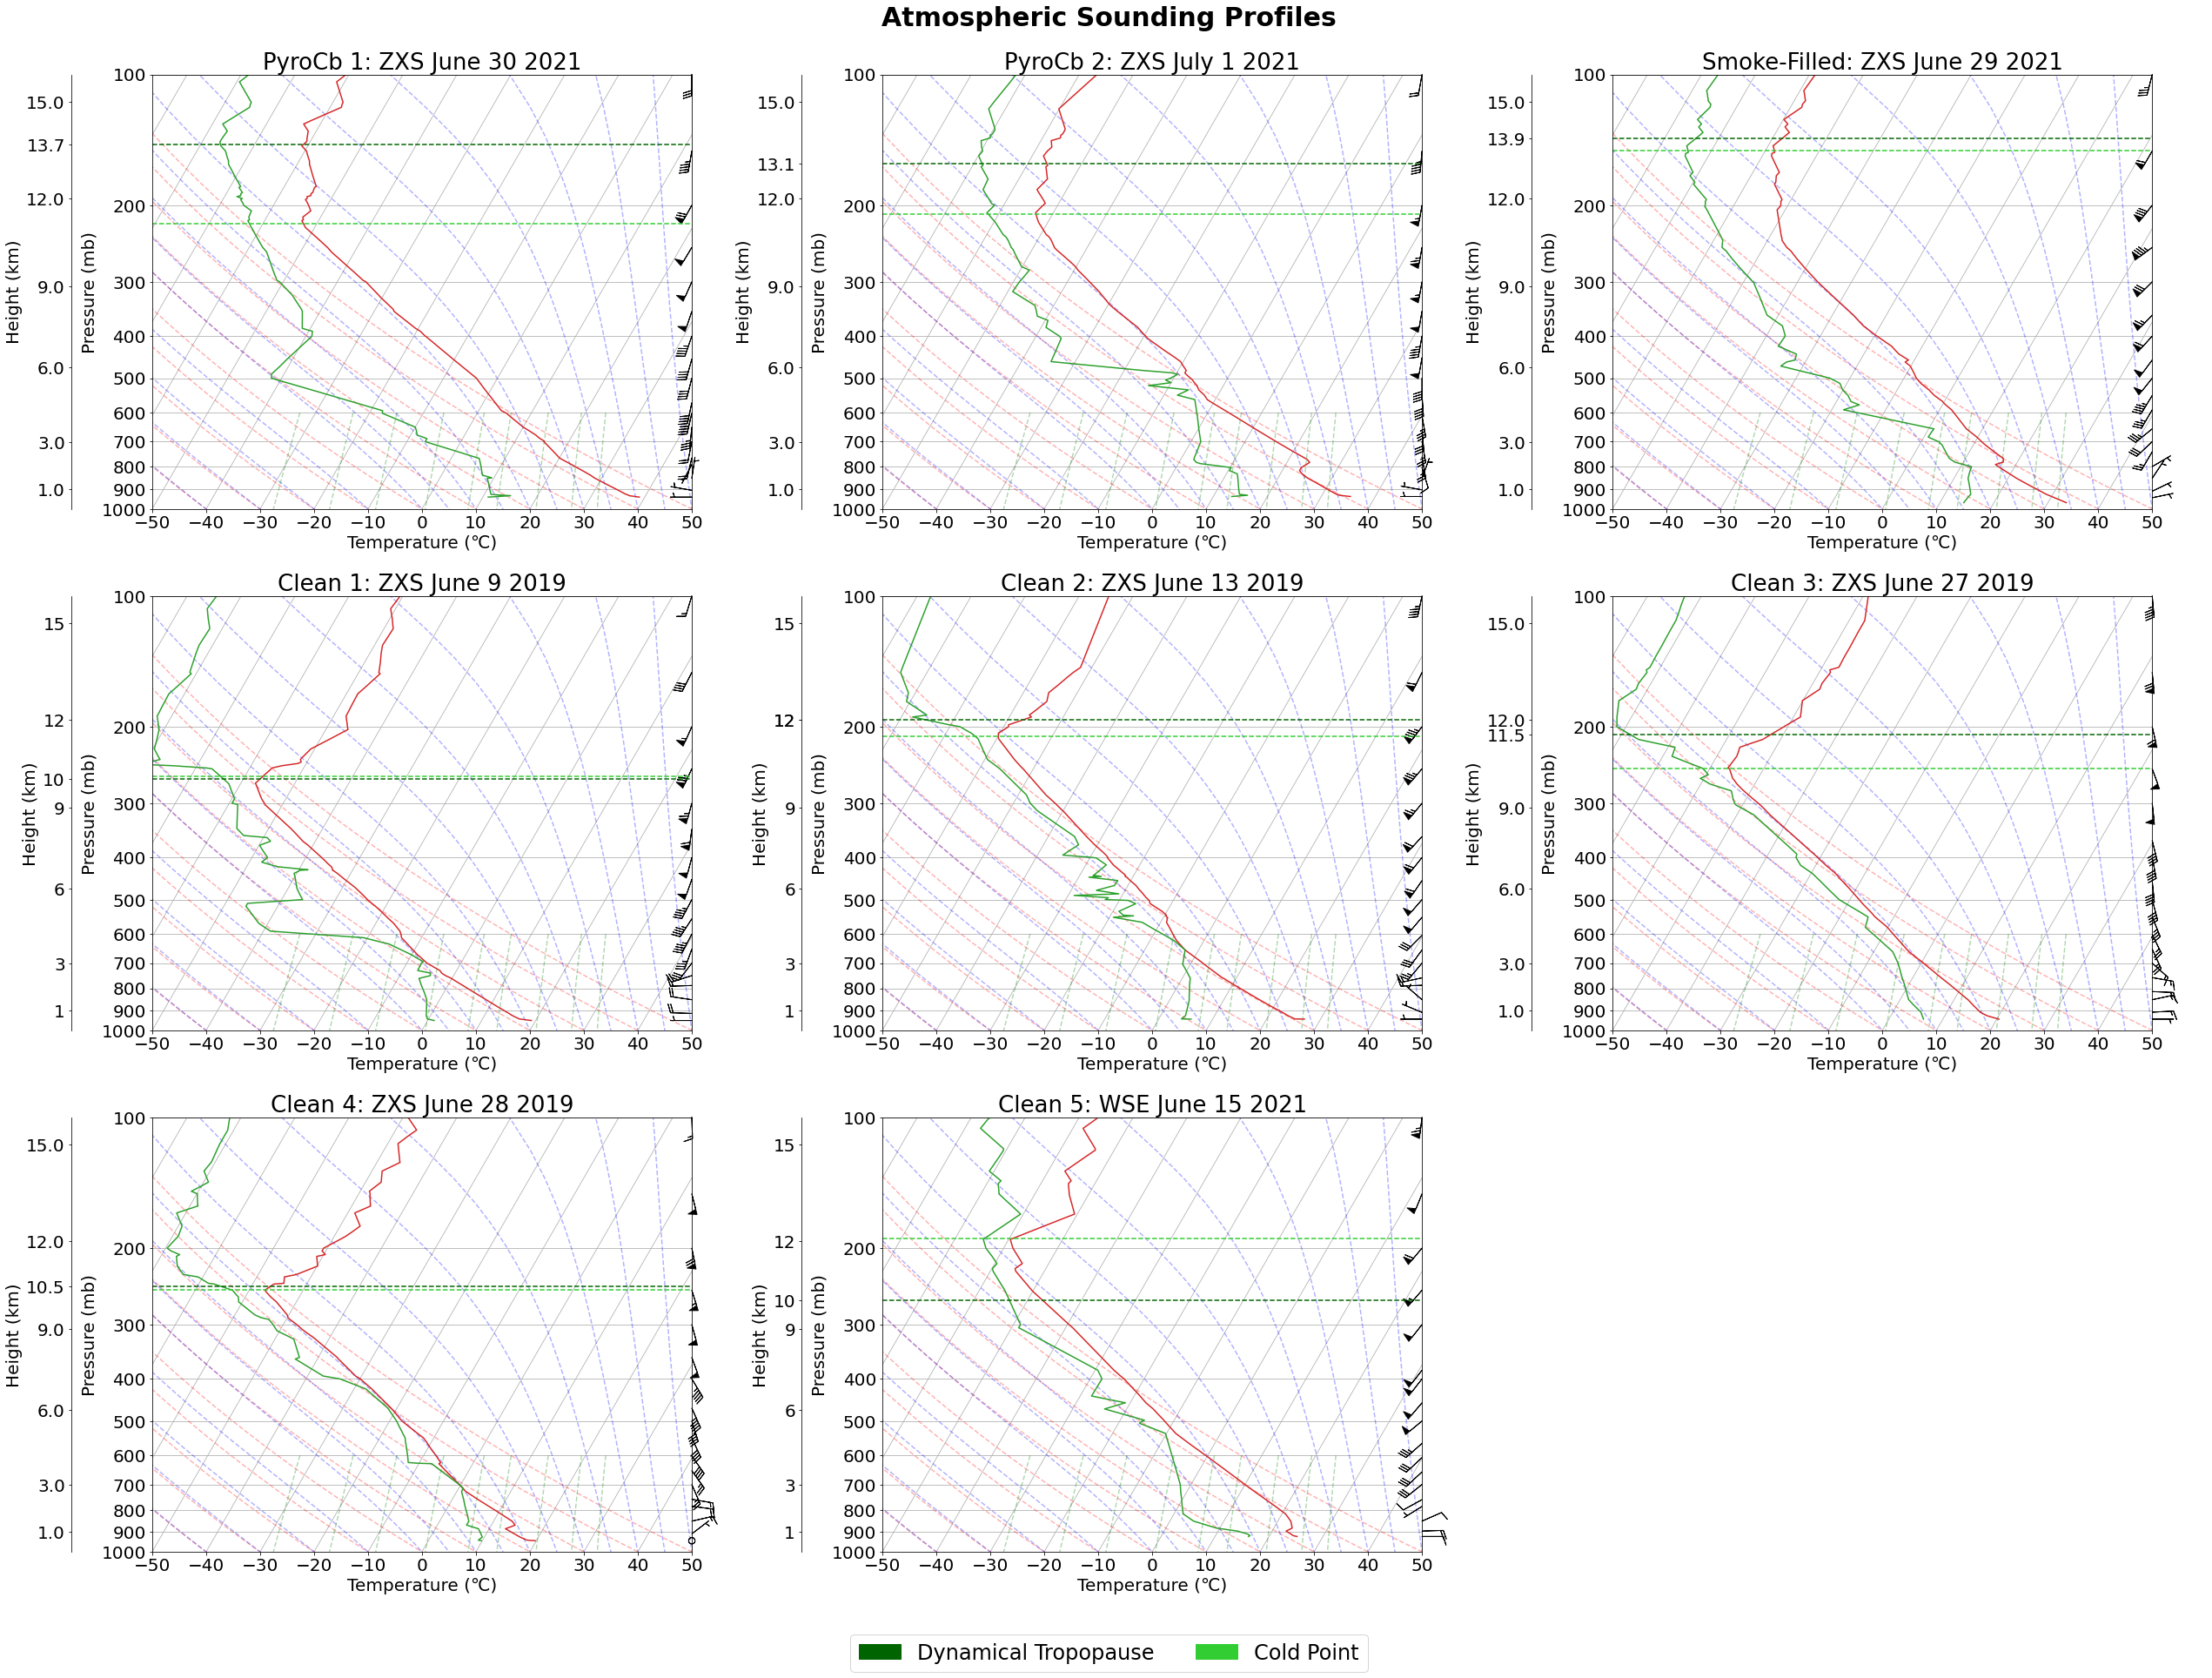

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import SkewT

dataset = [d_pyrocb1, d_pyrocb2, d_smoke, d_clean1, d_clean2, d_clean3, d_clean4, d_clean5]
titles = ["PyroCb 1: ZXS June 30 2021",
          "PyroCb 2: ZXS July 1 2021",
          "Smoke-Filled: ZXS June 29 2021",
          "Clean 1: ZXS June 9 2019",
          "Clean 2: ZXS June 13 2019",
          "Clean 3: ZXS June 27 2019",
          "Clean 4: ZXS June 28 2019",
          "Clean 5: WSE June 15 2021"]

tropopause = [13.7, 13.1, 13.9, 10.0, 12.0, 11.5, 10.5, 10.0]
coldpoint = [220, 210, 150, 260, 210, 250, 250, 190 ]


fig = plt.figure(figsize=(35, 25)) 
for i in range(len(dataset)):

    skew = SkewT(fig, subplot = (3,3,i+1))  # Pass the figure to the SkewT constructor
    
    skew.plot(dataset[i]["pressure"], dataset[i]["temperature"], 'tab:red')
    skew.plot(dataset[i]["pressure"], dataset[i]["dewpoint"], 'tab:green')
    skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})', fontsize = 20)
    skew.ax.set_ylabel('Pressure (mb)', fontsize = 20)
    my_interval = np.arange(100, 1000, 50) * units('mbar')

    ix = mpcalc.resample_nn_1d(dataset[i]["pressure"], my_interval)
    skew.plot_barbs(dataset[i]["pressure"][ix], dataset[i]["u_wind"][ix], d_pyrocb2["v_wind"][ix])

    # Add the relevant special lines
    skew.plot_dry_adiabats(alpha=0.3)
    skew.plot_moist_adiabats(alpha=0.3)
    skew.plot_mixing_lines(alpha=0.3)
    
    skew.ax.set_ylim(1000, 100)
    skew.ax.set_xlim(-50, 50)
    skew.ax.tick_params(axis='both', which='major', labelsize=20)

    trop_p = mpcalc.height_to_pressure_std(units.Quantity(tropopause[i], 'km')).m
    skew.ax.axhline(y=trop_p, linestyle='--', color="darkgreen")
    skew.ax.axhline(y=coldpoint[i], linestyle='--', color="limegreen")
    
    # add height labels to right y-axis
    secax = skew.ax.secondary_yaxis(-0.15,
                                    functions=(lambda p: mpcalc.pressure_to_height_std(units.Quantity(p, 'hPa')).m_as('km'),
                                               lambda h: mpcalc.height_to_pressure_std(units.Quantity(h, 'km')).m))
    secax.yaxis.set_major_locator(plt.FixedLocator([0, 1, 3, 6, 9, 12, tropopause[i], 15]))
    secax.yaxis.set_minor_locator(plt.NullLocator())
    secax.yaxis.set_major_formatter(plt.ScalarFormatter())
    secax.tick_params(axis='y', which='major', labelsize=20)
    secax.set_ylabel('Height (km)', fontsize = 20)
    
    
    plt.title(titles[i], fontsize=26)

darkgreen = mpatches.Patch(facecolor='darkgreen', edgecolor = "darkgreen", label=("Dynamical Tropopause"))
limegreen = mpatches.Patch(facecolor='limegreen', edgecolor = "limegreen", label=("Cold Point"))

fig.legend(handles=[darkgreen, limegreen], loc='lower center', 
            bbox_to_anchor=(0.5, -0.05),
            ncol=2, fancybox=True, shadow=False, fontsize = 24, markerscale=3.,)

# Adjust the layout of the subplots
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.suptitle("Atmospheric Sounding Profiles", y = 1.02, fontweight='bold', fontsize = 30)
# Display the figure with all subplots
plt.show()


In [7]:
coldpoint = [220, 210, 150, 260, 210, 250, 250, 190 ]
for i in range(len(coldpoint)): 
    cp = mpcalc.pressure_to_height_std(units.Quantity(coldpoint[i], 'hPa')).m_as('km')
    print(cp)

11.173137898798712
11.465113725624475
13.501714709781766
10.103086403812174
11.465113725624475
10.357375151717509
10.357375151717509
12.084580002163207


In [ ]:
# pyrocb 1 : 11.17 : -48 
# pyrocb 2: 11.46 : -49
# smoke: 13.5 : -58 
# clean 1 : 10.1 : -56
# clean 2 : 11.5 : -60 
# clean 3 : 10.3 : -56 
# clean 4 : 10. 4 -56 
# clean 5 : 12.0 : -58 